<a href="https://colab.research.google.com/github/Vishv05/Prodigy-InfoTech-Data-Science-Internship/blob/main/Task-03/Task_03_Decision_Tree_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (41188, 21)

First 5 Rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.

/tmp/ipython-input-3215667032.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)



Data After Encoding:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
1            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       

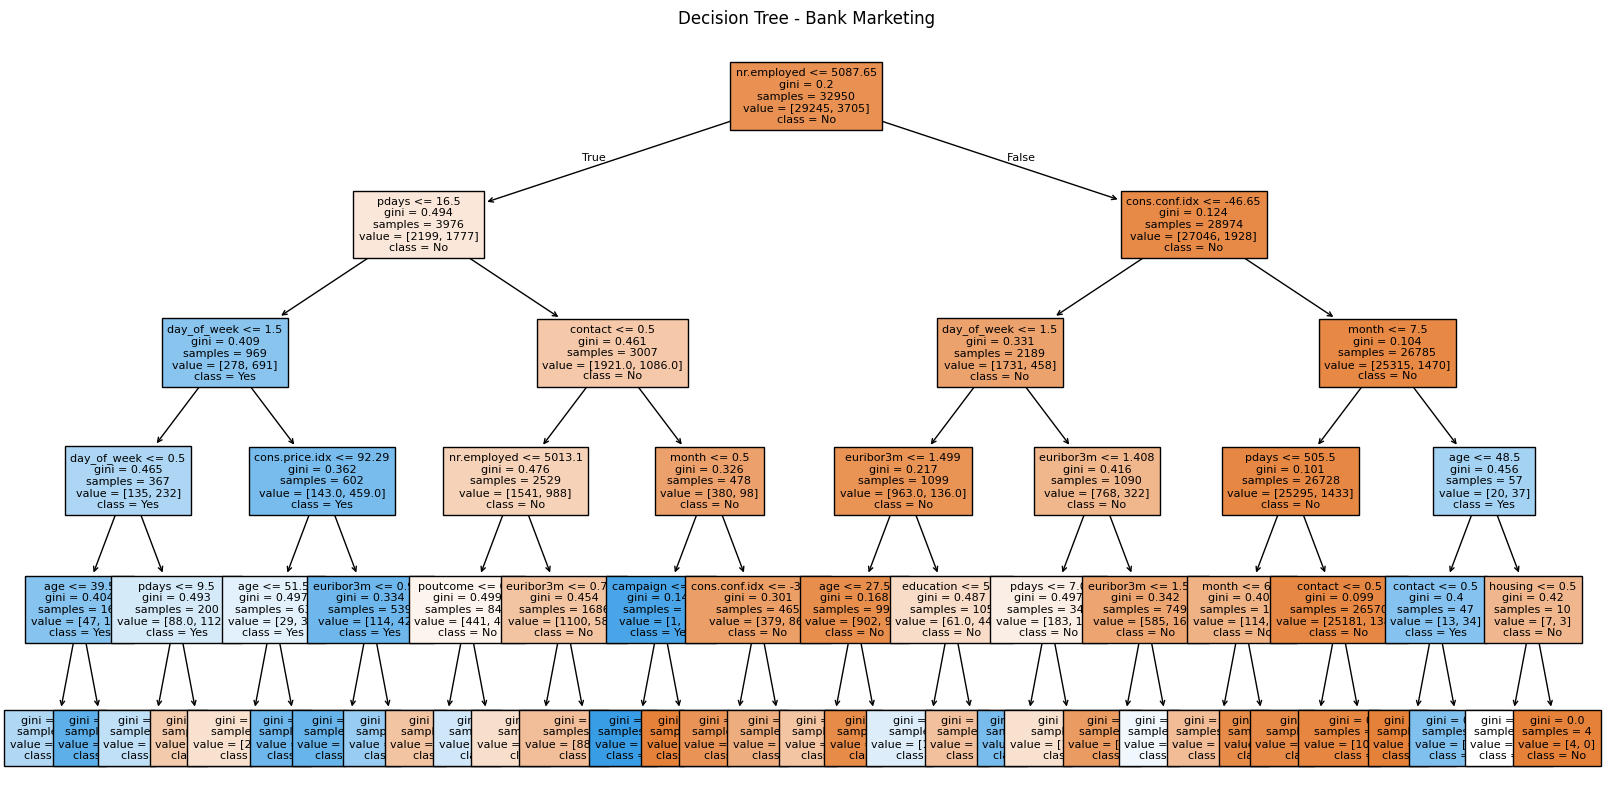


Feature Importance:

           Feature  Importance
18     nr.employed    0.640184
11           pdays    0.128332
16   cons.conf.idx    0.062287
17       euribor3m    0.049149
8            month    0.035311
9      day_of_week    0.027688
7          contact    0.024892
13        poutcome    0.012583
0              age    0.011906
15  cons.price.idx    0.004339
3        education    0.001438
10        campaign    0.001147
5          housing    0.000745
2          marital    0.000000
1              job    0.000000
4          default    0.000000
6             loan    0.000000
14    emp.var.rate    0.000000
12        previous    0.000000


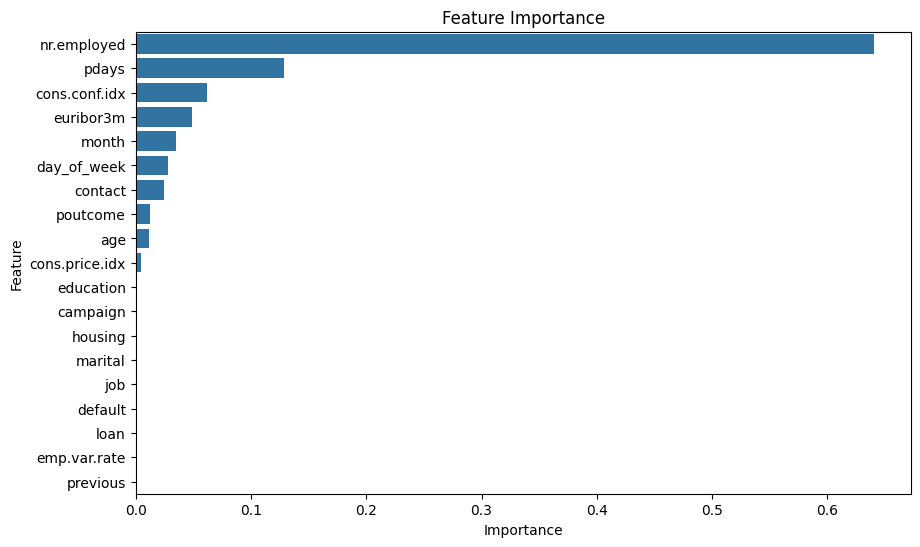


Task 03 Completed Successfully!


In [1]:
# ============================================================
# Prodigy InfoTech - Data Science Internship
# Task 03 - Decision Tree Classifier (Bank Marketing Dataset)
# Intern: Vishv Bhavsar
# Track Code: DS
# ============================================================

# ===============================
# 1. Import Required Libraries
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# ===============================
# 2. Load Dataset
# ===============================

# If using Google Colab, upload file first
# from google.colab import files
# files.upload()

df = pd.read_csv("bank-additional-full.csv", sep=";")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# ===============================
# 3. Data Cleaning
# ===============================

# Drop 'duration' (leakage feature)
if "duration" in df.columns:
    df.drop("duration", axis=1, inplace=True)

# Replace "unknown" with NaN
df.replace("unknown", np.nan, inplace=True)

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing categorical values with mode
for column in df.columns:
    if df[column].dtype == "object":
        df[column].fillna(df[column].mode()[0], inplace=True)

# ===============================
# 4. Encode Categorical Variables
# ===============================

label_encoders = {}

for column in df.columns:
    if df[column].dtype == "object":
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

print("\nData After Encoding:")
print(df.head())

# ===============================
# 5. Split Data
# ===============================

X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 6. Build Decision Tree Model
# ===============================

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# ===============================
# 7. Predictions
# ===============================

y_pred = model.predict(X_test)

# ===============================
# 8. Model Evaluation
# ===============================

accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ===============================
# 9. Visualize Decision Tree
# ===============================

plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    fontsize=8
)
plt.title("Decision Tree - Bank Marketing")
plt.show()

# ===============================
# 10. Feature Importance
# ===============================

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n")
print(importance)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance)
plt.title("Feature Importance")
plt.show()

print("\nTask 03 Completed Successfully!")
